# Train and compare two NN

In [20]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Functions.Preprocess import events_to_df, scale_shift_feats, for_nn
from Functions.Models import cnn, lstm, lstm_big, train
from Functions.Compare import compareAB

# Daata dir
dir = "Data/Non-rave/"

# Params
model_names = ["lstm","lstm_med"]
max_ev = int(1e5)
n_constits = 30
sort = "PT" # PT or D0
feats = ["track_D0", "track_DZ"] + ["track_PT", "track_Eta", "track_Phi", "track_DeltaR"] 
val_frac = 0.2

# Load data
bkg_path = [dir + "Background/bb1.txt",dir + "/Background/bb2.txt"]
sig_path = [dir + "Signal/dark1.txt", dir + "Signal/dark2.txt"]
bkg_path_test = [dir + "Background/bb3.txt"]
sig_path_test = [dir + "Signal/dark3.txt"]

#bkg_j = events_to_df(bkg_path, label=0, max_ev=max_ev, n_constits=n_constits, sort=sort)
sig_j = events_to_df(sig_path, label=1, max_ev=max_ev, n_constits=n_constits, sort=sort)
bkg_j_test = events_to_df(bkg_path_test, label=0, max_ev=max_ev, n_constits=n_constits, sort=sort)
sig_j_test = events_to_df(sig_path_test, label=1, max_ev=max_ev, n_constits=n_constits, sort=sort)

#print("num Background jets = {}".format(len(bkg_j)))
print("num Signal jets = {}".format(len(sig_j)))
#print("num Background test jets = {}".format(len(bkg_j_test)))
#print("num Signal test jets = {} \n".format(len(sig_j_test)))
sig_j.Event.describe(

)

num Signal jets = 124
Wall time: 328 ms


count    124.000000
mean     155.483871
std       90.382879
min        2.000000
25%       79.750000
50%      153.500000
75%      233.250000
max      320.000000
Name: Event, dtype: float64

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                11400     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 12,233
Trainable params: 12,233
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 128)           2432      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 64)            24640     
___________________________

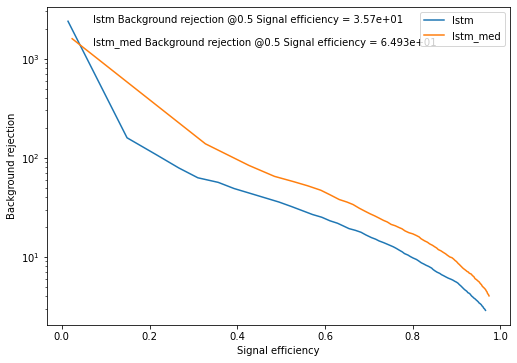

Wall time: 4min 33s


In [2]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Functions.Preprocess import events_to_df, scale_shift_feats, for_nn
from Functions.Models import cnn, lstm, lstm_big, train
from Funtions.Evaluate import compareAB

# Params
model_names = ["lstm","lstm_med"]
max_ev = int(1e5)
n_constits = 30
sort = "PT" # PT or D0
feats = ["track_D0", "track_DZ"] + ["track_PT", "track_Eta", "track_Phi", "track_DeltaR"] 
val_frac = 0.2

# Define models
model1 = lstm(n_constits, feats)
model2 = cnn(n_constits, feats)

# Load data
bkg_path = ["Data/Background/"+"bb1.txt","Data/Background/" + "bb2.txt"]
sig_path = ["Data/Signal/" + "dark1.txt", "Data/Signal/" + "dark2.txt"]
bkg_path_test = ["Data/Background/" + "bb3.txt"]
sig_path_test = ["Data/Signal/" + "dark3.txt"]

bkg_j = events_to_df(bkg_path, label=0, max_ev=max_ev, n_constits=n_constits, sort=sort)
sig_j = events_to_df(sig_path, label=1, max_ev=max_ev, n_constits=n_constits, sort=sort)
bkg_j_test = events_to_df(bkg_path_test, label=0, max_ev=max_ev, n_constits=n_constits, sort=sort)
sig_j_test = events_to_df(sig_path_test, label=1, max_ev=max_ev, n_constits=n_constits, sort=sort)

print("num Background jets = {}".format(len(bkg_j)))
print("num Signal jets = {}".format(len(sig_j)))
print("num Background test jets = {}".format(len(bkg_j_test)))
print("num Signal test jets = {} \n".format(len(sig_j_test)))

# Apply processing
train_val = pd.concat([sig_j,bkg_j.loc[range(sig_j.shape[0])]]).sample(frac=1).reset_index()
scale_shift_feats(train_val)
scale_shift_feats(bkg_j_test)
scale_shift_feats(sig_j_test)

# Split and reshape data 
X_train, y_train, X_val, y_val, X_test_B, X_test_S = for_nn(train_val, bkg_j_test, sig_j_test, feats, n_constits, val_frac=0.2)

# Train models
train(model1, X_train, y_train, X_val, y_val, model_names[0])
train(model2, X_train, y_train, X_val, y_val, model_names[1])

# Compare
compareAB(model_names[0], model_names[1], X_test_B, X_test_S)